# 선형 회귀

## 1. Python 패키지 Import

`numpy`와 `pyplot`을 사용하기 위해 패키지를 import 한다.

In [109]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 2. 데이터 읽고 전처리하기
1단계: pandas로 파일 읽기  
2단계: 데이터 정제  
    
    방법  
* 데이터가 온전한지 체크하기  
* 수치형 데이터는 정규화 해주기
* 데이터 범주형 데이터가 있다면 숫자로 표현하기  
* 학습데이터 나누기

## 파일 읽기

In [110]:
data = pd.read_csv("../BasicML/regression/data/house_price-train.csv")

## 데이터 정제하기

###  데이터가 온전한지 체크하기

불필요한 ID 컬럼 날리기

In [111]:
data.drop(["Id"], axis=1, inplace=True)
display(data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


빠진 데이터가 있는지 체크

In [112]:
missing_values = data.select_dtypes('number').isnull().sum().sort_values(ascending=False)
print(missing_values)

LotFrontage      259
GarageYrBlt       81
MasVnrArea         8
OpenPorchSF        0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageCars         0
GarageArea         0
WoodDeckSF         0
MSSubClass         0
BedroomAbvGr       0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
EnclosedPorch      0
FullBath           0
HalfBath           0
BsmtFinSF2         0
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
BsmtFinSF1         0
BsmtUnfSF          0
BsmtHalfBath       0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
SalePrice          0
dtype: int64


값이 비어있는 데이터를 가지고 있는 컬럼들 뽑기

In [113]:
missing_values_columns_numeric = data.select_dtypes('number').isnull().columns
missing_values_columns = data.select_dtypes(exclude='number').isnull().columns
print(missing_values_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


숫자형 데이터 채워넣고 null값이 있는 범주형 데이터 컬럼은 drop 시키기
(임의로 채워도 됩니다.)

In [114]:
for col in missing_values_columns_numeric:
     data[col] = data[col].fillna(data.loc[:, col].mean())

for col in missing_values_columns:
     data.drop(col, axis=1)

display(data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


##  데이터 정규화 하기
보통의 경우에는 타겟 value (Y, 맞추고자 하는 컬럼)까지 정규화를 하지 않아도 됩니다.
정규화를 하는 경우에는 나온 모델의 예측값 또한 inverse_transform으로 원복시켜주어야 합니다.

In [115]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
numeric_columns = data.loc[:, data.columns!="SalePrice"].select_dtypes('number').columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
display(data)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.073375,RL,-0.229372,-0.207142,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.068692,NaN,NaN,NaN,-0.087688,-1.599111,0.138777,WD,Normal,208500
1,-0.872563,RL,0.451936,-0.091886,Pave,NaN,Reg,Lvl,AllPub,FR2,...,-0.068692,NaN,NaN,NaN,-0.087688,-0.489110,-0.614439,WD,Normal,181500
2,0.073375,RL,-0.093110,0.073480,Pave,NaN,IR1,Lvl,AllPub,Inside,...,-0.068692,NaN,NaN,NaN,-0.087688,0.990891,0.138777,WD,Normal,223500
3,0.309859,RL,-0.456474,-0.096897,Pave,NaN,IR1,Lvl,AllPub,Corner,...,-0.068692,NaN,NaN,NaN,-0.087688,-1.599111,-1.367655,WD,Abnorml,140000
4,0.073375,RL,0.633618,0.375148,Pave,NaN,IR1,Lvl,AllPub,FR2,...,-0.068692,NaN,NaN,NaN,-0.087688,2.100892,0.138777,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,RL,-0.365633,-0.260560,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.068692,NaN,NaN,NaN,-0.087688,0.620891,-0.614439,WD,Normal,175000
1456,-0.872563,RL,0.679039,0.266407,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.068692,NaN,MnPrv,NaN,-0.087688,-1.599111,1.645210,WD,Normal,210000
1457,0.309859,RL,-0.183951,-0.147810,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.068692,NaN,GdPrv,Shed,4.953112,-0.489110,1.645210,WD,Normal,266500
1458,-0.872563,RL,-0.093110,-0.080160,Pave,NaN,Reg,Lvl,AllPub,Inside,...,-0.068692,NaN,NaN,NaN,-0.087688,-0.859110,1.645210,WD,Normal,142125


##  데이터 범주형 데이터가 있다면 숫자로 표현하기

In [116]:
non_numeric_columns = data.select_dtypes(exclude='number').columns
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

for i in non_numeric_columns:
    onehot = one_hot_encoder.fit_transform(data[[i]]).toarray()
    onehot= pd.DataFrame(onehot)
    onehot.columns = one_hot_encoder.get_feature_names_out()
    data = pd.concat([data, onehot],axis=1)
    data = data.drop(columns=[i])

display(data)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


##  학습데이터와 검증데이터로 나누기

In [117]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'SalePrice']
Y = data.loc[:, data.columns == 'SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# 모델 만들고 학습 및 검증하기
## 1. 모델 만들기

In [118]:
from tensorflow.keras.models import Sequential # keras의 Sequential()을 임포트
from tensorflow.keras.layers import Dense, Dropout # keras의 Dense()를 임포트
from tensorflow.keras import optimizers # keras의 옵티마이저를 임포트

# Sequential()로 model이라는 이름의 모델 객체을 만듭니다.
model = Sequential()

model.add(Dense(512, input_dim=len(data.columns) - 1, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# 모델 모양 확인
model.summary()

# optimer로는 adam, lr=0.5
adam = optimizers.Adam(learning_rate=0.3)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=adam, loss='mse', metrics=['mse'])


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 512)               155648    
                                                                 
 dense_36 (Dense)            (None, 128)               65664     
                                                                 
 dense_37 (Dense)            (None, 128)               16512     
                                                                 
 dense_38 (Dense)            (None, 64)                8256      
                                                                 
 dense_39 (Dense)            (None, 1)                 65        
                                                                 
Total params: 246,145
Trainable params: 246,145
Non-trainable params: 0
_________________________________________________________________


## 2. 학습하기

In [119]:
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 1000번 시도합니다.
model.fit(X_train, Y_train, batch_size=64, epochs=100, shuffle=True)

Epoch 1/100
16/16 [==============================] - 1s 7ms/step - loss: 502030041088.0000 - mse: 502030041088.0000
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 7919999488.0000 - mse: 7919999488.0000
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 4477856768.0000 - mse: 4477856768.0000
Epoch 4/100
16/16 [==============================] - 0s 7ms/step - loss: 1740546688.0000 - mse: 1740546688.0000
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 1275251840.0000 - mse: 1275251840.0000
Epoch 6/100
16/16 [==============================] - 0s 8ms/step - loss: 811186880.0000 - mse: 811186880.0000
Epoch 7/100
16/16 [==============================] - 0s 7ms/step - loss: 689744704.0000 - mse: 689744704.0000
Epoch 8/100
16/16 [==============================] - 0s 7ms/step - loss: 767566464.0000 - mse: 767566464.0000
Epoch 9/100
16/16 [==============================] - 0s 7ms/step - loss: 3527206912.0000 - mse: 3527206912

## 3. 모델 검증하기

14/14 [==============================] - 0s 3ms/step


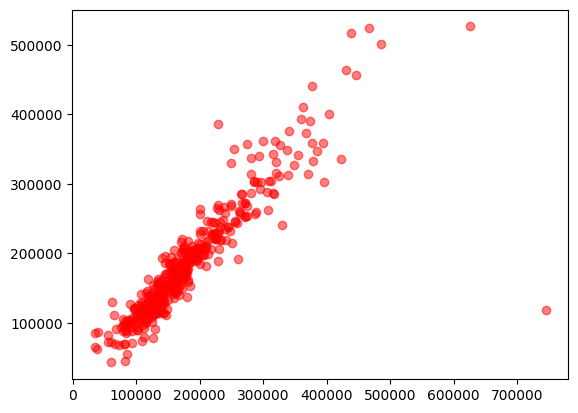

In [120]:
Y_predict = model.predict(X_test)

plt.figure()
plt.scatter(Y_test, Y_predict, alpha=.5, c=['r'])
plt.show()